In [1]:
import numpy as np # library to handle data in a vectorized manner


import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
path='~/Coursera/Data/Data_final.csv'
df = pd.read_csv(path)
df.head()

Quartiers villes   Latitude  Longitude
0  Quartier Saint-Germain-l'Auxerrois  Paris  48.860562   2.336489
1                          Les Halles  Paris  48.862567   2.345809
2            Quartier du Palais-Royal  Paris  48.863357   2.336062
3                               Paris  Paris  48.859116   2.331839
4                               Paris  Paris  48.859116   2.331839

## Rename columns

In [3]:
df.columns=['Neighborhood','cities','Latitude','Longitude']
df.shape

(544, 4)

## Create a map 

In [4]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [5]:
address = 'Paris'

geolocator = Nominatim(user_agent="Paris")
location = geolocator.geocode(address, timeout=10000)
Latitude = location.latitude
Longitude = location.longitude
print('The geograpical coordinate  are {}, {}.'.format(Latitude, Longitude))

The geograpical coordinate  are 48.8566969, 2.3514616.


## Create a map with neighborhoods superimposed on top

In [6]:
map_euro = folium.Map(location=[Latitude, Longitude], zoom_start=10)

# add markers to map
for lat, lng, cities, Neighborhood in zip(df['Latitude'], df['Longitude'], df['cities'], df['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, cities)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_euro)  
    
map_euro

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
CLIENT_ID = 'YGGTUGIV2OW5MFKCKGTB141YOR24ODKPSQFVFVFG4Y1Q4EEG' # your Foursquare ID
CLIENT_SECRET = '1TTFU41DWEPLXE1UTZBLH5R3Y145UCZBGOCFLM53150DQTMD' # your Foursquare Secret

VERSION = '20200228' # Foursquare API version

radius=500
LIMIT=100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: YGGTUGIV2OW5MFKCKGTB141YOR24ODKPSQFVFVFG4Y1Q4EEG
CLIENT_SECRET:1TTFU41DWEPLXE1UTZBLH5R3Y145UCZBGOCFLM53150DQTMD


In [9]:
euro_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Quartier Saint-Germain-l'Auxerrois
Les Halles
Quartier du Palais-Royal
Paris
Paris
Paris
Paris
Paris
Paris
Passage Sainte-Avoye
Quartier Saint-Merri
Paris
Paris
Notre-Dame
Quartier Saint-Victor
Paris
Paris
Quartier de la Sorbonne
Paris
Paris
Paris
Saint-Germain-des-Prés
Quartier Saint-Thomas-d'Aquin
Invalides
Paris
Paris
Champs-Élysées
Paris
Paris
Paris
Paris
Théâtre de la Porte-Saint-Martin
Paris
République Saint-Ambroise
Paris
Nation-Picpus
Paris
Bercy
Paris
Paris
Paris
Paris
Montparnasse
Petit-Montrouge
Paris
Paris
Grenelle
Javel
Auteuil
Paris
Paris
Paris
Paris
Batignolles
Épinettes
Paris
Goutte d'Or
La Chapelle
Paris
Paris
Paris
Belleville
Saint-Fargeau
Paris
Paris
La Acebeda
Alameda del Valle
Alcala de Henares
Alcorcón
Algete
Ambite
Aranjuez
Arroyomolinos
Batres
Belmonte de Tajo
Berzosa Del Lozoya
Boalo
Brea De Tajo
Buitrago
Cabanillas de la Sierra
Cadalso
Campo Real
Carabaña
Cenicientos
Cervera de Buitrago
Chinchón
Cobeña
Collado Villalba
Colmenar del Arroyo
Colmenarejo
Coslada
D

In [10]:
print(euro_venues.shape)
euro_venues.head()

(17929, 7)


Neighborhood  Neighborhood Latitude  \
0  Quartier Saint-Germain-l'Auxerrois              48.860562   
1  Quartier Saint-Germain-l'Auxerrois              48.860562   
2  Quartier Saint-Germain-l'Auxerrois              48.860562   
3  Quartier Saint-Germain-l'Auxerrois              48.860562   
4  Quartier Saint-Germain-l'Auxerrois              48.860562   

   Neighborhood Longitude                             Venue  Venue Latitude  \
0                2.336489             Cour Carrée du Louvre       48.860360   
1                2.336489                   Musée du Louvre       48.860847   
2                2.336489  La Vénus de Milo (Vénus de Milo)       48.859943   
3                2.336489                     Cour Napoléon       48.861172   
4                2.336489             Place du Palais Royal       48.862523   

   Venue Longitude    Venue Category  
0         2.338543  Pedestrian Plaza  
1         2.336440        Art Museum  
2         2.337234           Exhibit  
3         2.335088             Plaza  
4         2.336688             Plaza

In [11]:
euro_venues.head(20)

Neighborhood  Neighborhood Latitude  \
0   Quartier Saint-Germain-l'Auxerrois              48.860562   
1   Quartier Saint-Germain-l'Auxerrois              48.860562   
2   Quartier Saint-Germain-l'Auxerrois              48.860562   
3   Quartier Saint-Germain-l'Auxerrois              48.860562   
4   Quartier Saint-Germain-l'Auxerrois              48.860562   
5   Quartier Saint-Germain-l'Auxerrois              48.860562   
6   Quartier Saint-Germain-l'Auxerrois              48.860562   
7   Quartier Saint-Germain-l'Auxerrois              48.860562   
8   Quartier Saint-Germain-l'Auxerrois              48.860562   
9   Quartier Saint-Germain-l'Auxerrois              48.860562   
10  Quartier Saint-Germain-l'Auxerrois              48.860562   
11  Quartier Saint-Germain-l'Auxerrois              48.860562   
12  Quartier Saint-Germain-l'Auxerrois              48.860562   
13  Quartier Saint-Germain-l'Auxerrois              48.860562   
14  Quartier Saint-Germain-l'Auxerrois              48.860562   
15  Quartier Saint-Germain-l'Auxerrois              48.860562   
16  Quartier Saint-Germain-l'Auxerrois              48.860562   
17  Quartier Saint-Germain-l'Auxerrois              48.860562   
18  Quartier Saint-Germain-l'Auxerrois              48.860562   
19  Quartier Saint-Germain-l'Auxerrois              48.860562   

    Neighborhood Longitude                                              Venue  \
0                 2.336489                              Cour Carrée du Louvre   
1                 2.336489                                    Musée du Louvre   
2                 2.336489                   La Vénus de Milo (Vénus de Milo)   
3                 2.336489                                      Cour Napoléon   
4                 2.336489                              Place du Palais Royal   
5                 2.336489                 Vestige de la Forteresse du Louvre   
6                 2.336489              모나리자 / 라 조콘다 (Mona Lisa | La Joconde)   
7                 2.336489                                      Pont des Arts   
8                 2.336489                                Carrousel du Louvre   
9                 2.336489                                            Pylones   
10                2.336489                                  Comédie-Française   
11                2.336489                                      Le Café Marly   
12                2.336489                                       Palais Royal   
13                2.336489                                               Paul   
14                2.336489                          Café Richelieu – Angelina   
15                2.336489  Pavillon des Sessions – Arts d'Afrique, d'Asie...   
16                2.336489                                    Place du Louvre   
17                2.336489                                      Place Colette   
18                2.336489                             L'Occitane en Provence   
19                2.336489                                       A la Civette   

    Venue Latitude  Venue Longitude    Venue Category  
0        48.860360         2.338543  Pedestrian Plaza  
1        48.860847         2.336440        Art Museum  
2        48.859943         2.337234           Exhibit  
3        48.861172         2.335088             Plaza  
4        48.862523         2.336688             Plaza  
5        48.861577         2.333508     Historic Site  
6        48.860139         2.335337           Exhibit  
7        48.858565         2.337635            Bridge  
8        48.861642         2.334217     Shopping Mall  
9        48.861419         2.334143         Gift Shop  
10       48.863088         2.336612           Theater  
11       48.861740         2.335646              Café  
12       48.863236         2.337127     Historic Site  
13       48.860526         2.337634            Bakery  
14       48.861482         2.336456              Café  
15       48.860724         2.332121        Art Museum  
16    

In [67]:
euro_venues.groupby('Venue Category').count()

Neighborhood  Neighborhood Latitude  \
Venue Category                                                         
Advertising Agency                          1                      1   
Afghan Restaurant                          15                     15   
African Restaurant                         22                     22   
Airport                                     1                      1   
Alsatian Restaurant                         1                      1   
American Restaurant                        64                     64   
Antique Shop                                1                      1   
Arcade                                      1                      1   
Argentinian Restaurant                     16                     16   
Art Gallery                               149                    149   
Art Museum                                305                    305   
Arts & Crafts Store                        18                     18   
Arts & Entertainment                       19                     19   
Asian Restaurant                          173                    173   
Athletics & Sports                          6                      6   
Auditorium                                 40                     40   
Austrian Restaurant                        15                     15   
Auto Garage                                11                     11   
Auvergne Restaurant                         4                      4   
BBQ Joint                                   9                      9   
Bagel Shop                                  5                      5   
Bakery                                    496                    496   
Bar                                       322                    322   
Basketball Court                            2                      2   
Basketball Stadium                          4                      4   
Basque Restaurant                           4                      4   
Beach                                      45                     45   
Bed & Breakfast                             5                      5   
Beer Bar                                   50                     50   
Beer Garden                                 2                      2   
Beer Store                                  6                      6   
Belgian Restaurant                          3                      3   
Bike Rental / Bike Share                    8                      8   
Bike Trail                                  1                      1   
Bistro                                    144                    144   
Boat or Ferry                              47                     47   
Bookstore                                 163                    163   
Botanical Garden                           10                     10   
Boutique                                   73                     73   
Bowling Alley                               2                      2   
Brasserie                                  12                     12   
Brazilian Restaurant                       28                     28   
Breakfast Spot                            110                    110   
Breton Restaurant                           1                      1   
Brewery                                   119                    119   
Bridge                                     39                     39   
Bubble Tea Shop                             2                      2   
Building                                   15                     15   
Burger Joint                              264                    264   
Burrito Place                              11                     11   
Bus Station                                 2                      2   
Bus Stop                                   86                     86   
Butcher                                    19                     19   
Cafeteria                                  25                     25   
C

In [12]:
euro_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                
Ajalvir                                                 5   
Alameda del Valle                                       5   
Alcala de Henares                                      31   
Alcobendas                                             11   
Alcorcón                                                6   
Aldea del Fresno                                        8   
Algete                                                  8   
Alpedrete                                               5   
Anchuelo                                                1   
Aranjuez                                               34   
Arganda del Rey                                         5   
Arroyomolinos                                           5   
Auteuil                                                49   
Batignolles                                           100   
Becerril de la Sierra                                   2   
Belleville                                             48   
Belmonte de Tajo                                        1   
Bercy                                                  34   
Bexley                                                 36   
Boadilla del Monte                                      6   
Boalo                                                   4   
Braojos                                                 4   
Brent                                                  55   
Bromley                                                75   
Brunete                                                 7   
Buitrago                                               16   
Bustarviejo                                            10   
Cabanillas de la Sierra                                 2   
Cabrera                                                 6   
Cadalso                                                 7   
Camarma de Esteruelas                                   5   
Camden                                                460   
Campo Real                                              4   
Canencia                                                5   
Carabaña                                                1   
Casarrubuelos                                           4   
Cercedilla                                             12   
Cervera de Buitrago                                     4   
Champs-Élysées                                        100   
Chapinería                                              4   
Chinchón                                               24   
Ciempozuelos                                           11   
City and Islington College                             74   
Cobeña                                                  4   
Collado Mediano                                         4   
Collado Villalba                                        8   
Colmenar Viejo                                          4   
Colmenar de Oreja                                       4   
Colmenar del Arroyo                                     3   
Colmenarejo                                             7   
Coslada                                                10   
Croydon                                               116   
Cubas de la Sagra                                       1   
Daganzo de Arriba                                      11   
Ealing                                                490   
El Atazar                                               2   
El Escorial                                            44   
Enfield                                               342   
Estremera                                               2   
Fresnedillas de la Oliva                                4   
Fuenlabrada                                             9   
Fuente el Saz de Jarama                                 4   
Fuentidueña de Tajo                                     3   
Galapagar                                              11   
Garganta D

##  Analysing Each Neighborhood

In [13]:
# one hot encoding
euro_onehot = pd.get_dummies(euro_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
euro_onehot['Neighborhood'] = euro_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [euro_onehot.columns[-1]] + list(euro_onehot.columns[:-1])
euro_onehot.head()

Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
0                   0                  0                   0        0   
1                   0                  0                   0        0   
2                   0                  0                   0        0   
3                   0                  0                   0        0   
4                   0                  0                   0        0   

   Alsatian Restaurant  American Restaurant  Antique Shop  Arcade  \
0                    0                    0             0       0   
1                    0                    0             0       0   
2                    0                    0             0       0   
3                    0                    0             0       0   
4                    0                    0             0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           1                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auditorium  \
0                     0                 0                   0           0   
1                     0                 0                   0           0   
2                     0                 0                   0           0   
3                     0                 0                   0           0   
4                     0                 0                   0           0   

   Austrian Restaurant  Auto Garage  Auvergne Restaurant  BBQ Joint  \
0                    0            0                    0          0   
1                    0            0                    0          0   
2                    0            0                    0          0   
3                    0            0                    0          0   
4                    0            0                    0          0   

   Bagel Shop  Bakery  Bar  Basketball Court  Basketball Stadium  \
0           0       0    0                 0                   0   
1           0       0    0                 0                   0   
2           0       0    0                 0                   0   
3           0       0    0                 0                   0   
4           0       0    0                 0                   0   

   Basque Restaurant  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0                  0      0                0         0            0   
1                  0      0                0         0            0   
2                  0      0                0         0            0   
3                  0      0                0         0            0   
4                  0      0                0         0            0   

   Beer Store  Belgian Restaurant  Bike Rental / Bike Share  Bike Trail  \
0           0                   0                         0           0   
1           0                   0                         0           0   
2           0                   0                         0           0   
3           0                   0                         0           0   
4           0                   0                         0           0   

   Bistro  Boat or Ferry  Bookstore  Botanical Garden  Boutique  \
0       0              0          0                 0         0   
1       0              0          0                 0         0   
2       0              0          0                 0         0   
3       0              0          0                 0         0   
4       0              0          0                 0         0   

   Bowling Alley  Brasserie  Brazilian Restaurant  Breakfast Spot  \
0              0          0                     0

In [14]:
euro_onehot.shape

(17929, 321)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [15]:
euro_grouped = euro_onehot.groupby('Neighborhood').mean().reset_index()
euro_grouped

Neighborhood  Advertising Agency  \
0                               Ajalvir            0.000000   
1                     Alameda del Valle            0.000000   
2                     Alcala de Henares            0.000000   
3                            Alcobendas            0.000000   
4                              Alcorcón            0.000000   
5                      Aldea del Fresno            0.000000   
6                                Algete            0.000000   
7                             Alpedrete            0.000000   
8                              Anchuelo            0.000000   
9                              Aranjuez            0.000000   
10                      Arganda del Rey            0.000000   
11                        Arroyomolinos            0.000000   
12                              Auteuil            0.000000   
13                          Batignolles            0.000000   
14                Becerril de la Sierra            0.000000   
15                           Belleville            0.000000   
16                     Belmonte de Tajo            0.000000   
17                                Bercy            0.000000   
18                               Bexley            0.000000   
19                   Boadilla del Monte            0.166667   
20                                Boalo            0.000000   
21                              Braojos            0.000000   
22                                Brent            0.000000   
23                              Bromley            0.000000   
24                              Brunete            0.000000   
25                             Buitrago            0.000000   
26                          Bustarviejo            0.000000   
27              Cabanillas de la Sierra            0.000000   
28                              Cabrera            0.000000   
29                              Cadalso            0.000000   
30                Camarma de Esteruelas            0.000000   
31                               Camden            0.000000   
32                           Campo Real            0.000000   
33                             Canencia            0.000000   
34                             Carabaña            0.000000   
35                        Casarrubuelos            0.000000   
36                           Cercedilla            0.000000   
37                  Cervera de Buitrago            0.000000   
38                       Champs-Élysées            0.000000   
39                           Chapinería            0.000000   
40                             Chinchón            0.000000   
41                         Ciempozuelos            0.000000   
42           City and Islington College            0.000000   
43                               Cobeña            0.000000   
44                      Collado Mediano            0.000000   
45                     Collado Villalba            0.000000   
46                       Colmenar Viejo            0.000000   
47                    Colmenar de Oreja            0.000000   
48                  Colmenar del Arroyo            0.000000   
49                          Colmenarejo            0.000000   
50                              Coslada            0.000000   
51                              Croydon            0.000000   
52                    Cubas de la Sagra            0.000000   
53                    Daganzo de Arriba            0.000000   
54                               Ealing            0.000000   
55                            El Atazar            0.000000   
56                          El Escorial            0.000000   
57                              Enfield            0.000000   
58                            Estremera            0.000000   
59             Fresnedillas de la Oliva            0.000000   
60                          Fuenlabrada            0.000000   
61              Fuente el Saz de Jarama            0.000000   
62                  Fuentidueña de Tajo            0.00000

In [16]:
euro_grouped.columns

Index(['Neighborhood', 'Advertising Agency', 'Afghan Restaurant',
       'African Restaurant', 'Airport', 'Alsatian Restaurant',
       'American Restaurant', 'Antique Shop', 'Arcade',
       'Argentinian Restaurant',
       ...
       'Warehouse Store', 'Waterfront', 'Whisky Bar', 'Wine Bar', 'Wine Shop',
       'Wings Joint', 'Women's Store', 'Yoga Studio', 'Zoo', 'Zoo Exhibit'],
      dtype='object', length=321)

In [17]:
euro_grouped.shape

(204, 321)

#### Let's print each neighborhood along with the top 5 most common venues

In [18]:
num_top_venues = 10

for hood in euro_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = euro_grouped[euro_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ajalvir----
                           venue  freq
0         Furniture / Home Store   0.2
1                          Hotel   0.2
2       Mediterranean Restaurant   0.2
3                   Dessert Shop   0.2
4             Spanish Restaurant   0.2
5          Performing Arts Venue   0.0
6               Pedestrian Plaza   0.0
7                    Pastry Shop   0.0
8                           Park   0.0
9  Paper / Office Supplies Store   0.0


----Alameda del Valle----
                           venue  freq
0                     Restaurant   0.4
1             Spanish Restaurant   0.2
2                           Food   0.2
3         Argentinian Restaurant   0.2
4          Performing Arts Venue   0.0
5               Pedestrian Plaza   0.0
6                    Pastry Shop   0.0
7                           Park   0.0
8  Paper / Office Supplies Store   0.0
9                         Palace   0.0


----Alcala de Henares----
                      venue  freq
0          Tapas Restaurant  0.10
1 

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each Neighbourhood.

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighborhood'] = euro_grouped['Neighborhood']

for ind in np.arange(euro_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(euro_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0            Ajalvir          Dessert Shop    Spanish Restaurant   
1  Alameda del Valle            Restaurant    Spanish Restaurant   
2  Alcala de Henares      Tapas Restaurant                   Bar   
3         Alcobendas         Grocery Store           Pizza Place   
4           Alcorcón                   Gym         Grocery Store   

      3rd Most Common Venue     4th Most Common Venue   5th Most Common Venue  \
0                     Hotel  Mediterranean Restaurant  Furniture / Home Store   
1                      Food    Argentinian Restaurant             Zoo Exhibit   
2  Mediterranean Restaurant                Restaurant                     Pub   
3                      Food        Spanish Restaurant      Mexican Restaurant   
4              Concert Hall      Other Great Outdoors                   Plaza   

      6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0              Food Service     Fish & Chips Shop               Exhibit   
1         Fish & Chips Shop               Exhibit    Falafel Restaurant   
2        Spanish Restaurant                 Plaza    Frozen Yogurt Shop   
3  Mediterranean Restaurant                  Park                   Gym   
4          Department Store           Zoo Exhibit     Fish & Chips Shop   

  9th Most Common Venue 10th Most Common Venue  
0    Falafel Restaurant                   Farm  
1                  Farm         Farmers Market  
2                  Café            Coffee Shop  
3              Pharmacy                Stadium  
4    Falafel Restaurant                   Farm

##  Cluster Neighborhoods

### Determine k

In [21]:
new_df= euro_venues.groupby('Neighborhood').count()
new_df

Neighborhood Latitude  \
Neighborhood                                                
Ajalvir                                                 5   
Alameda del Valle                                       5   
Alcala de Henares                                      31   
Alcobendas                                             11   
Alcorcón                                                6   
Aldea del Fresno                                        8   
Algete                                                  8   
Alpedrete                                               5   
Anchuelo                                                1   
Aranjuez                                               34   
Arganda del Rey                                         5   
Arroyomolinos                                           5   
Auteuil                                                49   
Batignolles                                           100   
Becerril de la Sierra                                   2   
Belleville                                             48   
Belmonte de Tajo                                        1   
Bercy                                                  34   
Bexley                                                 36   
Boadilla del Monte                                      6   
Boalo                                                   4   
Braojos                                                 4   
Brent                                                  55   
Bromley                                                75   
Brunete                                                 7   
Buitrago                                               16   
Bustarviejo                                            10   
Cabanillas de la Sierra                                 2   
Cabrera                                                 6   
Cadalso                                                 7   
Camarma de Esteruelas                                   5   
Camden                                                460   
Campo Real                                              4   
Canencia                                                5   
Carabaña                                                1   
Casarrubuelos                                           4   
Cercedilla                                             12   
Cervera de Buitrago                                     4   
Champs-Élysées                                        100   
Chapinería                                              4   
Chinchón                                               24   
Ciempozuelos                                           11   
City and Islington College                             74   
Cobeña                                                  4   
Collado Mediano                                         4   
Collado Villalba                                        8   
Colmenar Viejo                                          4   
Colmenar de Oreja                                       4   
Colmenar del Arroyo                                     3   
Colmenarejo                                             7   
Coslada                                                10   
Croydon                                               116   
Cubas de la Sagra                                       1   
Daganzo de Arriba                                      11   
Ealing                                                490   
El Atazar                                               2   
El Escorial                                            44   
Enfield                                               342   
Estremera                                               2   
Fresnedillas de la Oliva                                4   
Fuenlabrada                                             9   
Fuente el Saz de Jarama                                 4   
Fuentidueña de Tajo                                     3   
Galapagar                                              11   
Garganta D

In [22]:
new_df[['Venue']].describe()

Venue
count   204.000000
mean     87.887255
std     326.871394
min       1.000000
25%       4.000000
50%       7.000000
75%      35.250000
max    2888.000000

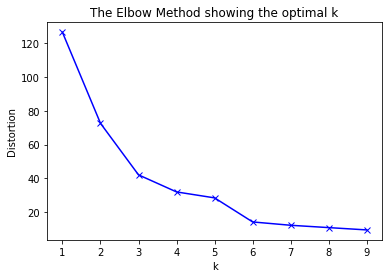

In [24]:
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(new_df['Venue'].values.reshape(-1, 1))
    distortions.append(sum(np.min(cdist(new_df['Venue'].values.reshape(-1, 1),
                                        k_means.cluster_centers_, 'euclidean'), axis=1)) / new_df['Venue'].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### The best k=5

### Run K-means algorithm to cluster the neighborhood into 5 clusters.

In [25]:
# set number of clusters
kclusters = 5

euro_grouped_clustering = euro_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(euro_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 1, 1, 0, 1, 2, 1, 0])

In [26]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

euro_merged = df 

# merge euro_grouped with euro data to add latitude/longitude for each Neighbourhood
euro_merged = euro_merged.join(neighbourhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

euro_merged.head() # check the last columns!

Neighborhood cities   Latitude  Longitude  \
0  Quartier Saint-Germain-l'Auxerrois  Paris  48.860562   2.336489   
1                          Les Halles  Paris  48.862567   2.345809   
2            Quartier du Palais-Royal  Paris  48.863357   2.336062   
3                               Paris  Paris  48.859116   2.331839   
4                               Paris  Paris  48.859116   2.331839   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             1.0     French Restaurant                 Hotel   
1             1.0     French Restaurant           Pizza Place   
2             1.0     French Restaurant   Japanese Restaurant   
3             1.0     French Restaurant                  Café   
4             1.0     French Restaurant                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Café                 Plaza           Coffee Shop   
1                Bakery          Cocktail Bar              Wine Bar   
2                  Café                 Hotel           Coffee Shop   
3                 Hotel               Exhibit            Art Museum   
4                 Hotel               Exhibit            Art Museum   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Bar                Bakery                Museum   
1        Clothing Store    Chinese Restaurant              Tea Room   
2                 Plaza                Bakery            Art Museum   
3    Italian Restaurant         Historic Site        Cosmetics Shop   
4    Italian Restaurant         Historic Site        Cosmetics Shop   

  9th Most Common Venue 10th Most Common Venue  
0            Art Museum         Cosmetics Shop  
1                 Hotel     Miscellaneous Shop  
2       Udon Restaurant          Historic Site  
3          Dessert Shop              Gift Shop  
4          Dessert Shop              Gift Shop

In [27]:
euro_merged.head(100)

Neighborhood cities   Latitude  Longitude  \
0   Quartier Saint-Germain-l'Auxerrois  Paris  48.860562   2.336489   
1                           Les Halles  Paris  48.862567   2.345809   
2             Quartier du Palais-Royal  Paris  48.863357   2.336062   
3                                Paris  Paris  48.859116   2.331839   
4                                Paris  Paris  48.859116   2.331839   
5                                Paris  Paris  48.859116   2.331839   
6                                Paris  Paris  48.859116   2.331839   
7                                Paris  Paris  48.859116   2.331839   
8                                Paris  Paris  48.859116   2.331839   
9                 Passage Sainte-Avoye  Paris  48.860604   2.356085   
10                Quartier Saint-Merri  Paris  48.858816   2.351523   
11                               Paris  Paris  48.859116   2.331839   
12                               Paris  Paris  48.859116   2.331839   
13                          Notre-Dame  Paris  48.851818   2.350100   
14               Quartier Saint-Victor  Paris  48.848381   2.357035   
15                               Paris  Paris  48.859116   2.331839   
16                               Paris  Paris  48.859116   2.331839   
17             Quartier de la Sorbonne  Paris  48.849401   2.345472   
18                               Paris  Paris  48.859116   2.331839   
19                               Paris  Paris  48.859116   2.331839   
20                               Paris  Paris  48.859116   2.331839   
21              Saint-Germain-des-Prés  Paris  48.854497   2.333945   
22       Quartier Saint-Thomas-d'Aquin  Paris  48.859673   2.326475   
23                           Invalides  Paris  48.857891   2.315424   
24                               Paris  Paris  48.859116   2.331839   
25                               Paris  Paris  48.859116   2.331839   
26                      Champs-Élysées  Paris  48.870763   2.305160   
27                               Paris  Paris  48.859116   2.331839   
28                               Paris  Paris  48.859116   2.331839   
29                               Paris  Paris  48.859116   2.331839   
30                               Paris  Paris  48.859116   2.331839   
31    Théâtre de la Porte-Saint-Martin  Paris  48.869092   2.356953   
32                               Paris  Paris  48.859116   2.331839   
33           République Saint-Ambroise  Paris  48.863374   2.370466   
34                               Paris  Paris  48.859116   2.331839   
35                       Nation-Picpus  Paris  48.845662   2.396831   
36                               Paris  Paris  48.859116   2.331839   
37                               Bercy  Paris  48.837277   2.383249   
38                               Paris  Paris  48.859116   2.331839   
39                               Paris  Paris  48.859116   2.331839   
40                               Paris  Paris  48.859116   2.331839   
41                               Paris  Paris  48.859116   2.331839   
42                        Montparnasse  Paris  48.843076   2.327227   
43                     Petit-Montrouge  Paris  48.825277   2.329282   
44                               Paris  Paris  48.859116   2.331839   
45                               Paris  Paris  48.859116   2.331839   
46                            Grenelle  Paris  48.846331   2.290858   
47                               Javel  Paris  48.841323   2.280845   
48                             Auteuil  Paris  48.848047   2.267539   
49                               Paris  Paris  48.859116   2.331839   
50                               Paris  Paris  48.859116   2.331839   
51                               Paris  Paris  48.859116   2.331839   
52                               Paris  Paris  48.859116   2.331839   
53                         Batignolles  Paris  48.886277   2.320842   
54                           Épinettes  Paris  48.893485   2.321994   
55                               Paris  Paris  48.

In [28]:
import numpy as np
euro_merged.dropna(subset=['Cluster Labels'], inplace = True)

In [29]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(euro_merged['Latitude'], euro_merged['Longitude'], euro_merged['Neighborhood'], euro_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 0

In [30]:
Cluster_0= euro_merged.loc[euro_merged['Cluster Labels'] == 0, euro_merged.columns[[1] + list(range(5, euro_merged.shape[1]))]]
Cluster_0

cities     1st Most Common Venue     2nd Most Common Venue  \
65   Spain        Spanish Restaurant               Zoo Exhibit   
71   Spain        Spanish Restaurant       American Restaurant   
76   Spain        Spanish Restaurant                Restaurant   
78   Spain        Spanish Restaurant                Restaurant   
80   Spain        Spanish Restaurant                       Bar   
81   Spain                   Brewery                Restaurant   
84   Spain                       Bar                   Brewery   
85   Spain        Spanish Restaurant                Restaurant   
86   Spain                      Park  Mediterranean Restaurant   
91   Spain             Grocery Store        Spanish Restaurant   
94   Spain        Spanish Restaurant        Athletics & Sports   
95   Spain        Spanish Restaurant                       Bar   
96   Spain        Spanish Restaurant                Restaurant   
99   Spain                    Hostel                Restaurant   
103  Spain        Spanish Restaurant                Restaurant   
104  Spain        Spanish Restaurant               Zoo Exhibit   
106  Spain                       Bar                    Hostel   
107  Spain           Nature Preserve        Spanish Restaurant   
108  Spain               Supermarket             Grocery Store   
111  Spain        Spanish Restaurant            History Museum   
114  Spain              Dessert Shop        Spanish Restaurant   
117  Spain        Spanish Restaurant                       Pub   
132  Spain        Spanish Restaurant        Italian Restaurant   
133  Spain               Yoga Studio        Spanish Restaurant   
137  Spain        Spanish Restaurant                    Bakery   
140  Spain        Spanish Restaurant  Mediterranean Restaurant   
147  Spain        Spanish Restaurant      Fast Food Restaurant   
148  Spain        Spanish Restaurant  Mediterranean Restaurant   
154  Spain        Spanish Restaurant              Burger Joint   
155  Spain                       Bar            Shop & Service   
157  Spain                       Bar        Spanish Restaurant   
158  Spain        Spanish Restaurant                Restaurant   
162  Spain                       Bar        Spanish Restaurant   
163  Spain               Pizza Place        Light Rail Station   
164  Spain                Steakhouse                      Café   
170  Spain  Mediterranean Restaurant        African Restaurant   
175  Spain        Spanish Restaurant                Restaurant   
182  Spain      Arts & Entertainment        Spanish Restaurant   
183  Spain                       Bar  Mediterranean Restaurant   
184  Spain        Spanish Restaurant               Pizza Place   
185  Spain        Spanish Restaurant                    Bakery   
192  Spain               Pastry Shop             Garden Center   
197  Spain        Spanish Restaurant                       Pub   
199  Spain        Spanish Restaurant                  Pharmacy   
210  Spain        Spanish Restaurant                Restaurant   
221  Spain        Spanish Restaurant                       Bar   
225  Spain        Spanish Restaurant          Tapas Restaurant   
240  Spain                      Park        Basketball Stadium   
241  Spain        Spanish Restaurant  Mediterranean Restaurant   

          3rd Most Common Venue     4th Most Common Venue  \
65                  Fish Market                   Exhibit   
71             Tapas Restaurant                      Café   
76                  Zoo Exhibit               Fish Market   
78                   Art Museum          Tapas Restaurant   
80                      Brewery                Restaurant   
81            Food & Drink Shop        Spanish Restaurant   
84                   Campground        Spanish Restaurant   
85                        Hotel              Burger Joint   
86            Paella Restaurant        Spanish Restaurant   
91                    BBQ Joint                    Office   
94                  Zoo Exhibit 

In [31]:
Cluster_0.groupby('cities').count()

1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
cities                                                                        
Spain                      49                     49                     49   

        4th Most Common Venue  5th Most Common Venue  6th Most Common Venue  \
cities                                                                        
Spain                      49                     49                     49   

        7th Most Common Venue  8th Most Common Venue  9th Most Common Venue  \
cities                                                                        
Spain                      49                     49                     49   

        10th Most Common Venue  
cities                          
Spain                       49

### Cluster 1

In [32]:
Cluster_1 = euro_merged.loc[euro_merged['Cluster Labels'] == 1, euro_merged.columns[[1] + list(range(5, euro_merged.shape[1]))]]
Cluster_1

cities       1st Most Common Venue          2nd Most Common Venue  \
0     Paris           French Restaurant                          Hotel   
1     Paris           French Restaurant                    Pizza Place   
2     Paris           French Restaurant            Japanese Restaurant   
3     Paris           French Restaurant                           Café   
4     Paris           French Restaurant                           Café   
5     Paris           French Restaurant                           Café   
6     Paris           French Restaurant                           Café   
7     Paris           French Restaurant                           Café   
8     Paris           French Restaurant                           Café   
9     Paris           French Restaurant                     Restaurant   
10    Paris           French Restaurant                    Art Gallery   
11    Paris           French Restaurant                           Café   
12    Paris           French Restaurant                           Café   
13    Paris           French Restaurant                          Hotel   
14    Paris           French Restaurant                         Museum   
15    Paris           French Restaurant                           Café   
16    Paris           French Restaurant                           Café   
17    Paris           French Restaurant                          Hotel   
18    Paris           French Restaurant                           Café   
19    Paris           French Restaurant                           Café   
20    Paris           French Restaurant                           Café   
21    Paris           French Restaurant                          Hotel   
22    Paris           French Restaurant                          Hotel   
23    Paris           French Restaurant                          Plaza   
24    Paris           French Restaurant                           Café   
25    Paris           French Restaurant                           Café   
26    Paris                       Hotel              French Restaurant   
27    Paris           French Restaurant                           Café   
28    Paris           French Restaurant                           Café   
29    Paris           French Restaurant                           Café   
30    Paris           French Restaurant                           Café   
31    Paris           French Restaurant             Italian Restaurant   
32    Paris           French Restaurant                           Café   
33    Paris                      Bakery              French Restaurant   
34    Paris           French Restaurant                           Café   
35    Paris           French Restaurant                            Bar   
36    Paris           French Restaurant                           Café   
37    Paris           French Restaurant                          Hotel   
38    Paris           French Restaurant                           Café   
39    Paris           French Restaurant                           Café   
40    Paris           French Restaurant                           Café   
41    Paris           French Restaurant                           Café   
42    Paris           French Restaurant                          Hotel   
43    Paris                       Hotel              French Restaurant   
44    Paris           French Restaurant                           Café   
45    Paris           French Restaurant                           Café   
46    Paris                       Hotel             Italian Restaurant   
47    Paris           French Restaurant                         Bakery   
48    Paris           French Restaurant             Italian Restaurant   
49    Paris           French Restaurant                           Café   
50    Paris           French Restaurant                           Café   
51    Paris           French Restaurant                           Café   
52    Paris           French Restaurant                           Café   
53    Par

In [33]:
Cluster_1.groupby('cities').count()

1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
cities                                                                        
London                    302                    302                    302   
Paris                      65                     65                     65   
Spain                      76                     76                     76   

        4th Most Common Venue  5th Most Common Venue  6th Most Common Venue  \
cities                                                                        
London                    302                    302                    302   
Paris                      65                     65                     65   
Spain                      76                     76                     76   

        7th Most Common Venue  8th Most Common Venue  9th Most Common Venue  \
cities                                                                        
London                    302                    302                    302   
Paris                      65                     65                     65   
Spain                      76                     76                     76   

        10th Most Common Venue  
cities                          
London                     302  
Paris                       65  
Spain                       76

### Cluster 2

In [43]:
Cluster_2 = euro_merged.loc[euro_merged['Cluster Labels'] == 2, euro_merged.columns[[1] + list(range(5, euro_merged.shape[1]))]]
Cluster_2

cities        1st Most Common Venue 2nd Most Common Venue  \
66   Spain                   Restaurant    Spanish Restaurant   
88   Spain                   Restaurant           Zoo Exhibit   
92   Spain                   Restaurant           Zoo Exhibit   
98   Spain                  Music Venue            Restaurant   
112  Spain                   Restaurant                   Bar   
118  Spain                   Restaurant         Train Station   
130  Spain                   Restaurant        Breakfast Spot   
136  Spain                   Restaurant                 Plaza   
142  Spain  Professional & Other Places            Restaurant   
166  Spain                   Restaurant       Nature Preserve   
171  Spain                   Restaurant                 Plaza   
222  Spain                   Restaurant           Zoo Exhibit   
235  Spain                   Restaurant                   Bar   

     3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
66                    Food  Argentinian Restaurant           Zoo Exhibit   
88             Fish Market                 Exhibit    Falafel Restaurant   
92             Fish Market                 Exhibit    Falafel Restaurant   
98                    Park             Zoo Exhibit     Fish & Chips Shop   
112            Snack Place              Playground           Coffee Shop   
118     Spanish Restaurant                   Hotel           Zoo Exhibit   
130                  Plaza      Spanish Restaurant           Zoo Exhibit   
136                   City             Zoo Exhibit     Fish & Chips Shop   
142                Brewery             Fish Market               Exhibit   
166     Spanish Restaurant             Fish Market               Exhibit   
171            Zoo Exhibit       Fish & Chips Shop           Event Space   
222            Fish Market                 Exhibit    Falafel Restaurant   
235  Outdoors & Recreation              Kids Store               Exhibit   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
66      Fish & Chips Shop               Exhibit    Falafel Restaurant   
88                   Farm        Farmers Market  Fast Food Restaurant   
92                   Farm        Farmers Market  Fast Food Restaurant   
98                Exhibit    Falafel Restaurant                  Farm   
112           Film Studio           Event Space               Exhibit   
118           Film Studio           Event Space               Exhibit   
130     Fish & Chips Shop               Exhibit    Falafel Restaurant   
136               Exhibit    Falafel Restaurant                  Farm   
142    Falafel Restaurant                  Farm        Farmers Market   
166    Falafel Restaurant                  Farm        Farmers Market   
171               Exhibit    Falafel Restaurant                  Farm   
222                  Farm        Farmers Market  Fast Food Restaurant   
235    Falafel Restaurant                  Farm        Farmers Market   

    9th Most Common Venue 10th Most Common Venue  
66                   Farm         Farmers Market  
88            Film Studio      Fish & Chips Shop  
92            Film Studio      Fish & Chips Shop  
98         Farmers Market   Fast Food Restaurant  
112    Falafel Restaurant                   Farm  
118    Falafel Restaurant                   Farm  
130                  Farm         Farmers Market  
136        Farmers Market   Fast Food Restaurant  
142  Fast Food Restaurant            Film Studio  
166  Fast Food Restaurant            Film Studio  
171        Farmers Market   Fast Food Restaurant  
222           Film Studio      Fish & Chips Shop  
235  Fast Food Restaurant            Film Studio

In [49]:
Cluster_2.groupby('cities').count()

1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
cities                                                                        
Spain                      13                     13                     13   

        4th Most Common Venue  5th Most Common Venue  6th Most Common Venue  \
cities                                                                        
Spain                      13                     13                     13   

        7th Most Common Venue  8th Most Common Venue  9th Most Common Venue  \
cities                                                                        
Spain                      13                     13                     13   

        10th Most Common Venue  
cities                          
Spain                       13

### Cluster 3

In [50]:
Cluster_3 = euro_merged.loc[euro_merged['Cluster Labels'] == 3, euro_merged.columns[[1] + list(range(5, euro_merged.shape[1]))]]
Cluster_3 

cities 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
122  Spain                 Hotel  Ethiopian Restaurant               Exhibit   
178  Spain                 Hotel  Ethiopian Restaurant               Exhibit   
213  Spain                 Hotel  Ethiopian Restaurant               Exhibit   
218  Spain      Tapas Restaurant                 Hotel           Flea Market   
219  Spain                 Hotel             Gastropub           Flea Market   
228  Spain            Playground                 Hotel           Fish Market   
232  Spain                 Hotel             BBQ Joint    Photography Studio   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
122    Falafel Restaurant                  Farm        Farmers Market   
178    Falafel Restaurant                  Farm        Farmers Market   
213    Falafel Restaurant                  Farm        Farmers Market   
218               Exhibit    Falafel Restaurant                  Farm   
219               Exhibit    Falafel Restaurant                  Farm   
228           Event Space               Exhibit    Falafel Restaurant   
232           Fish Market               Exhibit    Falafel Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
122  Fast Food Restaurant           Film Studio     Fish & Chips Shop   
178  Fast Food Restaurant           Film Studio     Fish & Chips Shop   
213  Fast Food Restaurant           Film Studio     Fish & Chips Shop   
218        Farmers Market  Fast Food Restaurant           Film Studio   
219        Farmers Market  Fast Food Restaurant           Film Studio   
228                  Farm        Farmers Market  Fast Food Restaurant   
232                  Farm        Farmers Market  Fast Food Restaurant   

    10th Most Common Venue  
122            Fish Market  
178            Fish Market  
213            Fish Market  
218      Fish & Chips Shop  
219      Fish & Chips Shop  
228            Film Studio  
232            Film Studio

In [51]:
Cluster_3.groupby('cities').count()

1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
cities                                                                        
Spain                       7                      7                      7   

        4th Most Common Venue  5th Most Common Venue  6th Most Common Venue  \
cities                                                                        
Spain                       7                      7                      7   

        7th Most Common Venue  8th Most Common Venue  9th Most Common Venue  \
cities                                                                        
Spain                       7                      7                      7   

        10th Most Common Venue  
cities                          
Spain                        7

### Cluster 4

In [52]:
Cluster_4 = euro_merged.loc[euro_merged['Cluster Labels'] == 4, euro_merged.columns[[1] + list(range(5, euro_merged.shape[1]))]]
Cluster_4

cities 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
121  Spain                  Lake                   Bar           Zoo Exhibit   
143  Spain                 Hotel                   Bar           Flea Market   
193  Spain                   Bar           Zoo Exhibit    Frozen Yogurt Shop   
194  Spain                   Bar      Motorsports Shop           Zoo Exhibit   
236  Spain                   Bar          Tennis Court           Zoo Exhibit   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
121    Falafel Restaurant                  Farm        Farmers Market   
143    Falafel Restaurant                  Farm        Farmers Market   
193    Falafel Restaurant                  Farm        Farmers Market   
194           Flea Market                  Farm        Farmers Market   
236           Event Space    Falafel Restaurant                  Farm   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
121  Fast Food Restaurant           Film Studio     Fish & Chips Shop   
143  Fast Food Restaurant           Film Studio     Fish & Chips Shop   
193  Fast Food Restaurant           Film Studio     Fish & Chips Shop   
194  Fast Food Restaurant           Film Studio     Fish & Chips Shop   
236        Farmers Market  Fast Food Restaurant           Film Studio   

    10th Most Common Venue  
121            Fish Market  
143            Fish Market  
193            Fish Market  
194            Fish Market  
236      Fish & Chips Shop

In [53]:
Cluster_4.groupby('cities').count()

1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
cities                                                                        
Spain                       5                      5                      5   

        4th Most Common Venue  5th Most Common Venue  6th Most Common Venue  \
cities                                                                        
Spain                       5                      5                      5   

        7th Most Common Venue  8th Most Common Venue  9th Most Common Venue  \
cities                                                                        
Spain                       5                      5                      5   

        10th Most Common Venue  
cities                          
Spain                        5

In [54]:
from collections import Counter 
First = Counter(Cluster_1['1st Most Common Venue']).most_common(10)
First
First

[('Pub', 88),
 ('Café', 66),
 ('French Restaurant', 57),
 ('Hotel', 48),
 ('Clothing Store', 31),
 ('Coffee Shop', 30),
 ('Convenience Store', 14),
 ('Gym', 13),
 ('Supermarket', 12),
 ('Bar', 10)]

In [55]:
Second = Counter(Cluster_1['2nd Most Common Venue']).most_common(10)
Second

[('Café', 69),
 ('Coffee Shop', 65),
 ('Pub', 61),
 ('Brewery', 23),
 ('Restaurant', 21),
 ('Fast Food Restaurant', 21),
 ('Sandwich Place', 19),
 ('Garden', 16),
 ('Burger Joint', 15),
 ('Clothing Store', 13)]

In [56]:
third = Counter(Cluster_1['3rd Most Common Venue']).most_common(10)
third

[('Hotel', 56),
 ('Art Museum', 46),
 ('Coffee Shop', 39),
 ('Supermarket', 23),
 ('Bar', 22),
 ('Plaza', 21),
 ('Grocery Store', 20),
 ('Convenience Store', 20),
 ('Eastern European Restaurant', 19),
 ('Historic Site', 16)]

In [57]:
fourth = Counter(Cluster_1['4th Most Common Venue']).most_common(10)
fourth

[('Bakery', 61),
 ('Exhibit', 49),
 ('Gym / Fitness Center', 46),
 ('Park', 30),
 ('Hotel Bar', 20),
 ('Outdoor Sculpture', 19),
 ('Pub', 18),
 ('Playground', 16),
 ('Restaurant', 15),
 ('Building', 15)]

In [58]:
fifth = Counter(Cluster_1['5th Most Common Venue']).most_common(10)
fifth

[('Pub', 51),
 ('Art Museum', 38),
 ('Bus Stop', 27),
 ('Coffee Shop', 25),
 ('Café', 21),
 ('Gym / Fitness Center', 21),
 ('Brazilian Restaurant', 20),
 ('Grocery Store', 18),
 ('Tree', 16),
 ('Falafel Restaurant', 15)]

In [59]:
sixth = Counter(Cluster_1['6th Most Common Venue']).most_common(10)
sixth

[('Scenic Lookout', 45),
 ('Italian Restaurant', 40),
 ('Restaurant', 34),
 ('Zoo Exhibit', 25),
 ('Park', 22),
 ('Market', 21),
 ('Hotel', 19),
 ('Brewery', 18),
 ('Fish & Chips Shop', 17),
 ('Playground', 17)]

In [60]:
seventh = Counter(Cluster_1['7th Most Common Venue']).most_common(10)
seventh

[('Historic Site', 57),
 ('Restaurant', 45),
 ('Coffee Shop', 28),
 ('Falafel Restaurant', 26),
 ('Grocery Store', 26),
 ('Fish & Chips Shop', 23),
 ('Movie Theater', 21),
 ('Pharmacy', 19),
 ('Cocktail Bar', 18),
 ('Farmers Market', 16)]

In [61]:
eighth = Counter(Cluster_1['8th Most Common Venue']).most_common(10)
eighth

[('Bakery', 50),
 ('Cosmetics Shop', 38),
 ('Fast Food Restaurant', 37),
 ('Park', 35),
 ('Supermarket', 28),
 ('Falafel Restaurant', 28),
 ('Farm', 26),
 ('Market', 20),
 ('Sandwich Place', 18),
 ('Clothing Store', 18)]

In [62]:
ninth = Counter(Cluster_1['9th Most Common Venue']).most_common(10)
ninth

[('Burger Joint', 45),
 ('Dessert Shop', 38),
 ('Sushi Restaurant', 31),
 ('Farm', 28),
 ('Café', 26),
 ('Farmers Market', 26),
 ('Film Studio', 22),
 ('Italian Restaurant', 22),
 ('Soccer Field', 21),
 ('Platform', 21)]

In [63]:
tenth = Counter(Cluster_1['10th Most Common Venue']).most_common(10)
tenth

[('Café', 69),
 ('Gift Shop', 49),
 ('Fast Food Restaurant', 28),
 ('Farmers Market', 28),
 ('Cosmetics Shop', 22),
 ('Garden', 21),
 ('Flower Shop', 19),
 ('Hotel Bar', 19),
 ('Sporting Goods Shop', 18),
 ('Boutique', 18)]

In [64]:
CommonVenu = First+Second+third+ fourth + fifth+ sixth + seventh + eighth + ninth + tenth
#CommonVenu = Counter(CommonVenu).most_common()
CommonVenu

[('Pub', 88),
 ('Café', 66),
 ('French Restaurant', 57),
 ('Hotel', 48),
 ('Clothing Store', 31),
 ('Coffee Shop', 30),
 ('Convenience Store', 14),
 ('Gym', 13),
 ('Supermarket', 12),
 ('Bar', 10),
 ('Café', 69),
 ('Coffee Shop', 65),
 ('Pub', 61),
 ('Brewery', 23),
 ('Restaurant', 21),
 ('Fast Food Restaurant', 21),
 ('Sandwich Place', 19),
 ('Garden', 16),
 ('Burger Joint', 15),
 ('Clothing Store', 13),
 ('Hotel', 56),
 ('Art Museum', 46),
 ('Coffee Shop', 39),
 ('Supermarket', 23),
 ('Bar', 22),
 ('Plaza', 21),
 ('Grocery Store', 20),
 ('Convenience Store', 20),
 ('Eastern European Restaurant', 19),
 ('Historic Site', 16),
 ('Bakery', 61),
 ('Exhibit', 49),
 ('Gym / Fitness Center', 46),
 ('Park', 30),
 ('Hotel Bar', 20),
 ('Outdoor Sculpture', 19),
 ('Pub', 18),
 ('Playground', 16),
 ('Restaurant', 15),
 ('Building', 15),
 ('Pub', 51),
 ('Art Museum', 38),
 ('Bus Stop', 27),
 ('Coffee Shop', 25),
 ('Café', 21),
 ('Gym / Fitness Center', 21),
 ('Brazilian Restaurant', 20),
 ('Grocer